# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [20]:
# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
new_merge_df=merge_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
new_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [13]:
# Checking the number of mice.
number_mice=len(merge_df["Mouse ID"].unique())
number_mice

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID=new_merge_df[new_merge_df[['Mouse ID','Timepoint']].duplicated()]
unique_duplicate_mice_ID=duplicate_mice_ID['Mouse ID'].unique()
unique_duplicate_mice_ID

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = new_merge_df.loc[new_merge_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = new_merge_df.loc[new_merge_df["Mouse ID"] != "g989", :]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [35]:
# Checking the number of mice in the clean DataFrame.
clean_mice=len(clean_df["Mouse ID"].unique())
clean_mice

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [39]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
median.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [40]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [41]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
std_dev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
std_dev.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [43]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
sem.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [44]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std_dev, 
                           "Tumor Volume Std. Err.":sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregation=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas.
regimen_count = clean_df["Drug Regimen"].value_counts()
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

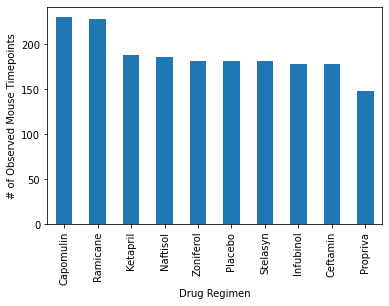

In [53]:
# Create the first bar chart with the Pandas DataFrame.plot() method
pandas_plot=regimen_count.plot.bar()

# Add xlabel, ylabel
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_count))
y_axis =regimen_count.values

Text(0, 0.5, '# of Observed Mouse Timepoints')

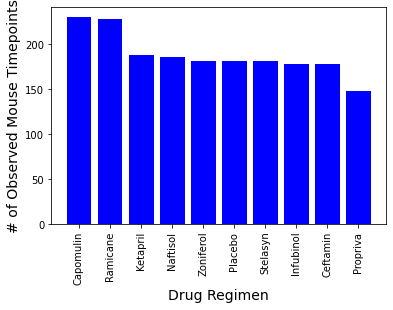

In [68]:
# Create the second bar chart with Matplotlib's pyplot methods.
plt.bar(x_axis, y_axis, color='blue', align='center')

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Placebo','Stelasyn','Infubinol','Ceftamin','Propriva'],rotation="vertical")

# Add xlabel, ylabel
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 14)

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# A pie plot showing the distribution of female versus male mice using Pandas is generated
gender_data = clean_df["Sex"].value_counts()
gender_data

Male      958
Female    922
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

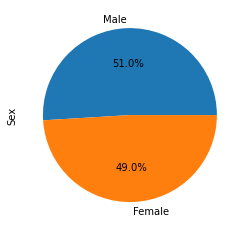

In [71]:
# Create the first pie chart with the Pandas DataFrame.plot() method.
gender_data.plot.pie(autopct= "%1.1f%%")

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [922,958]


Text(0, 0.5, 'Sex')

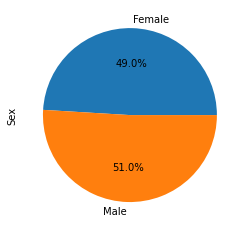

In [77]:
# Create the second pie chart with Matplotlib's pyplot methods.
plt.pie(sizes,labels=labels, autopct="%1.1f%%")

plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [81]:
# Capomulin - Start by getting the last (greatest) timepoint for each mouse
Capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
10,s185,0,45.000000,0,Capomulin,Female,3,17
11,s185,5,43.878496,0,Capomulin,Female,3,17
12,s185,10,37.614948,0,Capomulin,Female,3,17
13,s185,15,38.177232,0,Capomulin,Female,3,17
14,s185,20,36.866876,0,Capomulin,Female,3,17


In [90]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_df = pd.DataFrame(Capomulin_last)
Capomulin_df.head()

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45


In [92]:
# Merge this grouped DataFrame with the original cleaned DataFrame.
Capomulin_merge = pd.merge(Capomulin_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [93]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Determine if there are any potential outliers
Capomulin_tumor=Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [94]:
# Ramicane
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
Ramicane_last = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_df = pd.DataFrame(Ramicane_last)
Ramicane_df.head()

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30


In [95]:
# Merge this grouped DataFrame with the original cleaned DataFrame.
Ramicane_merge = pd.merge(Ramicane_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [96]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Determine if there are any potential outliers
Ramicane_tumor=Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [101]:
# Infubinol
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
Infubinol_last = Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_df = pd.DataFrame(Infubinol_last)
Infubinol_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45


In [102]:
# Merge this grouped DataFrame with the original cleaned DataFrame.
Infubinol_merge = pd.merge(Infubinol_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [103]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Determine if there are any potential outliers
Infubinol_tumor=Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [104]:
# Ceftamin
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
Ceftamin_last = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_df = pd.DataFrame(Ceftamin_last)
Ceftamin_df.head()

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15


In [105]:
# Merge this grouped DataFrame with the original cleaned DataFrame.
Ceftamin_merge = pd.merge(Ceftamin_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [106]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Determine if there are any potential outliers
Ceftamin_tumor=Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
plotdata= [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]

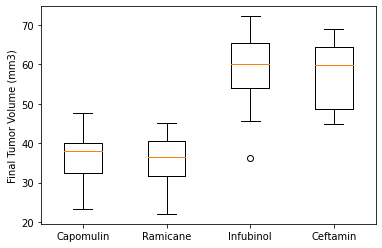

In [109]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(plotdata,labels=regimen)
plt.show()

## Line and Scatter Plots

In [124]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
single_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
371,l509,0,45.000000,0,Capomulin,Male,17,21
372,l509,5,45.851193,0,Capomulin,Male,17,21
373,l509,10,46.759074,0,Capomulin,Male,17,21
374,l509,15,47.488599,1,Capomulin,Male,17,21
375,l509,20,48.070452,2,Capomulin,Male,17,21


In [125]:
# generate a line plot of tumor volume versus time point for that mouse.
y_axis = single_mouse["Tumor Volume (mm3)"]
x_axis= single_mouse["Timepoint"]

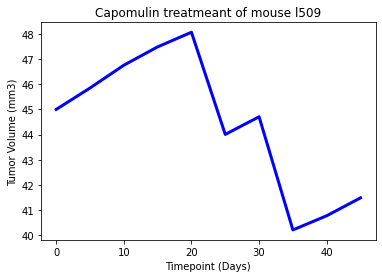

In [129]:
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis,linewidth=3, color="blue")

In [133]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
10,s185,0,45.000000,0,Capomulin,Female,3,17
11,s185,5,43.878496,0,Capomulin,Female,3,17
12,s185,10,37.614948,0,Capomulin,Female,3,17
13,s185,15,38.177232,0,Capomulin,Female,3,17
14,s185,20,36.866876,0,Capomulin,Female,3,17


In [134]:
avg_capomulin =Capomulin.groupby(['Mouse ID']).mean()
avg_capomulin

/var/folders/zj/t8b8zsx12wb9jp41qwn21qg80000gp/T/ipykernel_19386/3426909836.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capomulin =Capomulin.groupby(['Mouse ID']).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

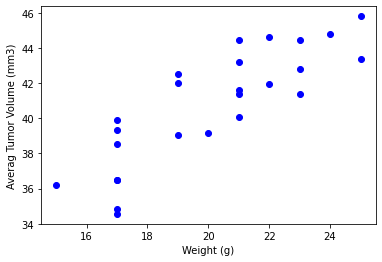

In [135]:
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [143]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


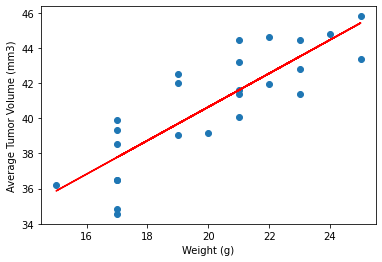

In [144]:
# Plot the different factors in a scatter plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()